# Experiment 6 - n-think in complex games

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random

In [2]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Notebook variables

In [2]:
exp_number = 6

seeds = range(1,51)
n_episodes = 1
max_steps = 100
n_think_indices = [4,10]
models = ["0", "e1", "r4", "r10"]

levels = {"coin_collector": 14, "cooking": 9, "treasure_hunter": 27}

In [3]:
with open(f"./games/max_scores_simple.pickle", "rb") as f:
    max_scores_simple = pickle.load(f)
max_scores_simple = max_scores_simple[:len(seeds)]

with open(f"./games/max_scores_cooking.pickle", "rb") as f:
    max_scores_cooking = pickle.load(f)

# Game generation

### Coin Collector & Treasure Hunter (most seeds)

In [ ]:
import subprocess

for game in levels.keys():
    if game == "cooking":
        continue # we generate cooking in another way
    for level in range(1, levels[game]+1):
        for seed in seeds:
            subprocess.run(["tw-make", f"tw-{game}",
                            "--silent", "--force",
                            "--level", f"{level}",
                            "--seed", f"{seed}",
                            "--output", f"games/{game}/level{level}-seed{seed}.z8"]) 

### Cooking

In [ ]:
import subprocess
for seed in seeds:
    # level 1
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "1", "--take", "1", "--recipe", "1", "--cut", "--cook",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level1-seed{seed}.z8"])
    # level 2
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "1", "--take", "2", "--recipe", "2", "--cut", "--cook",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level2-seed{seed}.z8"])
    #level 3
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "1", "--take", "3", "--recipe", "3", "--cut", "--cook",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level3-seed{seed}.z8"])
    # level 4
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "6", "--take", "1", "--recipe", "1", "--cut", "--cook",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level4-seed{seed}.z8"])
    # level 5
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "6", "--take", "2", "--recipe", "2", "--cut", "--cook",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level5-seed{seed}.z8"])
    # level 6
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "6", "--take", "3", "--recipe", "3", "--cut", "--cook",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level6-seed{seed}.z8"])
    # level 7
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "6", "--take", "3", "--recipe", "3", "--cut", "--cook", "--open",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level7-seed{seed}.z8"])
    # level 8
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "6", "--take", "3", "--recipe", "3", "--cut", "--cook", "--open", "--drop",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level8-seed{seed}.z8"])
    # level 9
    subprocess.run(["tw-make", f"tw-cooking",
                    "--silent", "--force",
                    "--go", "9", "--take", "3", "--recipe", "3", "--cut", "--cook", "--open",
                    "--seed", f"{seed}",
                    "--output", f"games/cooking/level9-seed{seed}.z8"])

### Missing seeds of Treasure Hunter
- level 9/10 seeds 8/9/11/12/14/17/20/22/30/33/34/38/40/44/45/49
- level 20 seeds 3/21/26/32/43

In [44]:
import subprocess

game = "treasure_hunter"
level = 10
seed = 49
true_seed = 0
subprocess.run(["tw-make", f"tw-{game}",
                            "--silent", "--force",
                            "--level", f"{level}",
                            "--seed", f"{true_seed}",
                            "--output", f"games/{game}/level{level}-seed{seed}.z8"]) 

CompletedProcess(args=['tw-make', 'tw-treasure_hunter', '--silent', '--force', '--level', '10', '--seed', '0', '--output', 'games/treasure_hunter/level10-seed49.z8'], returncode=0)

# Game running

In [4]:
n_episodes = 1
max_steps = 100

In [ ]:
for n in [0]:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            for seed in range(11,51):
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n,
                                                    reads_own_reasoning=False,
                                                    random_selfeval=False,
                                                    log=f"./Experiment {exp_number}/logs/{game}/{n}think_level{level}-seed{seed}.log"
                                                    ),
                               f"games/{game}/level{level}-seed{seed}.z8",
                               max_steps=max_steps,
                               n_episodes=n_episodes)
                results_all_seeds.append(results[0])
            with open(f"./Experiment {exp_number}/{n}think_{game}_level{level}_extended.pickle", "wb") as f:
                pickle.dump(results_all_seeds, f)
                print("Data pickled.")

In [6]:
for n in [4,10]:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            if not (n == 10 and game == "treasure_hunter" and level == 27):
                continue
            results_all_seeds = []
            for seed in range(11,21):
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n,
                                                    reads_own_reasoning=True,
                                                    random_selfeval=True,
                                                    log=f"./Experiment {exp_number}/logs/{game}/r{n}think_level{level}-seed{seed}.log"
                                                    ),
                               f"games/{game}/level{level}-seed{seed}.z8",
                               max_steps=max_steps,
                               n_episodes=n_episodes)
                results_all_seeds.append(results[0])
            with open(f"./Experiment {exp_number}/r{n}think_{game}_level{level}_extended.pickle", "wb") as f:
                pickle.dump(results_all_seeds, f)
                print("Data pickled.")

games/treasure_hunter/level27-seed11.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 128 s.
games/treasure_hunter/level27-seed12.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 129 s.
games/treasure_hunter/level27-seed13.z8 .  	avg. steps:   9.0; avg. score:  0.0 / 1; total execution time: 2 s.
games/treasure_hunter/level27-seed14.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 104 s.
games/treasure_hunter/level27-seed15.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 153 s.
games/treasure_hunter/level27-seed16.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 175 s.
games/treasure_hunter/level27-seed17.z8 .  	avg. steps:  20.0; avg. score:  1.0 / 1; total execution time: 43 s.
games/treasure_hunter/level27-seed18.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total execution time: 317 s.
games/treasure_hunter/level27-seed19.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1; total 

In [ ]:
# e1think

for game in levels.keys():
    if game == "coin_collector":
        continue # skip runs we've already done
    for level in range(1, levels[game]+1):
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=1,
                                              reads_own_reasoning=False,
                                              random_selfeval=False,
                                              log=f"./Experiment {exp_number}/logs/{game}/e1think_level{level}-seed{seed}.log"
                                              ),
                          f"games/{game}/level{level}-seed{seed}.z8",
                          max_steps=max_steps,
                          n_episodes=n_episodes)
            results_all_seeds.append(results[0])
        with open(f"./Experiment {exp_number}/e1think_{game}_level{level}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f)
            print("Data pickled.")

# Data aggregation for visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import bootstrap

In [6]:
final_arrays_scores = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}
final_arrays_times = {"coin_collector": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "treasure_hunter": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])},
                    "cooking": {"0": ([],[]), "e1": ([],[]), "r4":([],[]), "r10": ([],[])}}

for n in models:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            with open(f"./Experiment {exp_number}/{n}think_{game}_level{level}.pickle", "rb") as f:
                results_all_seeds = pickle.load(f)
            
            final_scores = [run[-1][1] for run in results_all_seeds] # score
            if game == "cooking":
                final_scores = np.array(final_scores) / max_scores_cooking[level - 1]
            avg_final_score = np.mean(final_scores)
            bootstrap_score = bootstrap(data=(final_scores,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays_scores[game][n][0].append(avg_final_score)
            final_arrays_scores[game][n][1].append((bootstrap_score.confidence_interval.high, bootstrap_score.confidence_interval.low))

            final_times = [run[-1][2] for run in results_all_seeds] # time
            avg_final_time = np.mean(final_times)
            bootstrap_time = bootstrap(data=(final_times,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays_times[game][n][0].append(avg_final_time)
            final_arrays_times[game][n][1].append((bootstrap_time.confidence_interval.high, bootstrap_time.confidence_interval.low))

            # STANDARD DEVIATION
            # final_scores = [run[-1][1] for run in results_all_seeds] # score
            # if game == "cooking":
            #     final_scores = np.array(final_scores) / max_scores_cooking[level - 1]
            # avg_final_score = np.mean(final_scores)
            # std_score = np.std(final_scores)
            # final_arrays_scores[game][n][0].append(avg_final_score)
            # final_arrays_scores[game][n][1].append((avg_final_score + std_score, avg_final_score - std_score))

            # final_times = [run[-1][2] for run in results_all_seeds] # time
            # avg_final_time = np.mean(final_times)
            # std_time = np.std(final_times)
            # final_arrays_times[game][n][0].append(avg_final_time)
            # final_arrays_times[game][n][1].append((avg_final_time + std_time, avg_final_time - std_time))

# Visualization

In [7]:
figsize=(10,15)

In [8]:
custom_palette = ['#c44e52', '#55a868', '#64b5cd', '#ccb974']
custom_linestyles = ["-", "-", "-.", "--"]

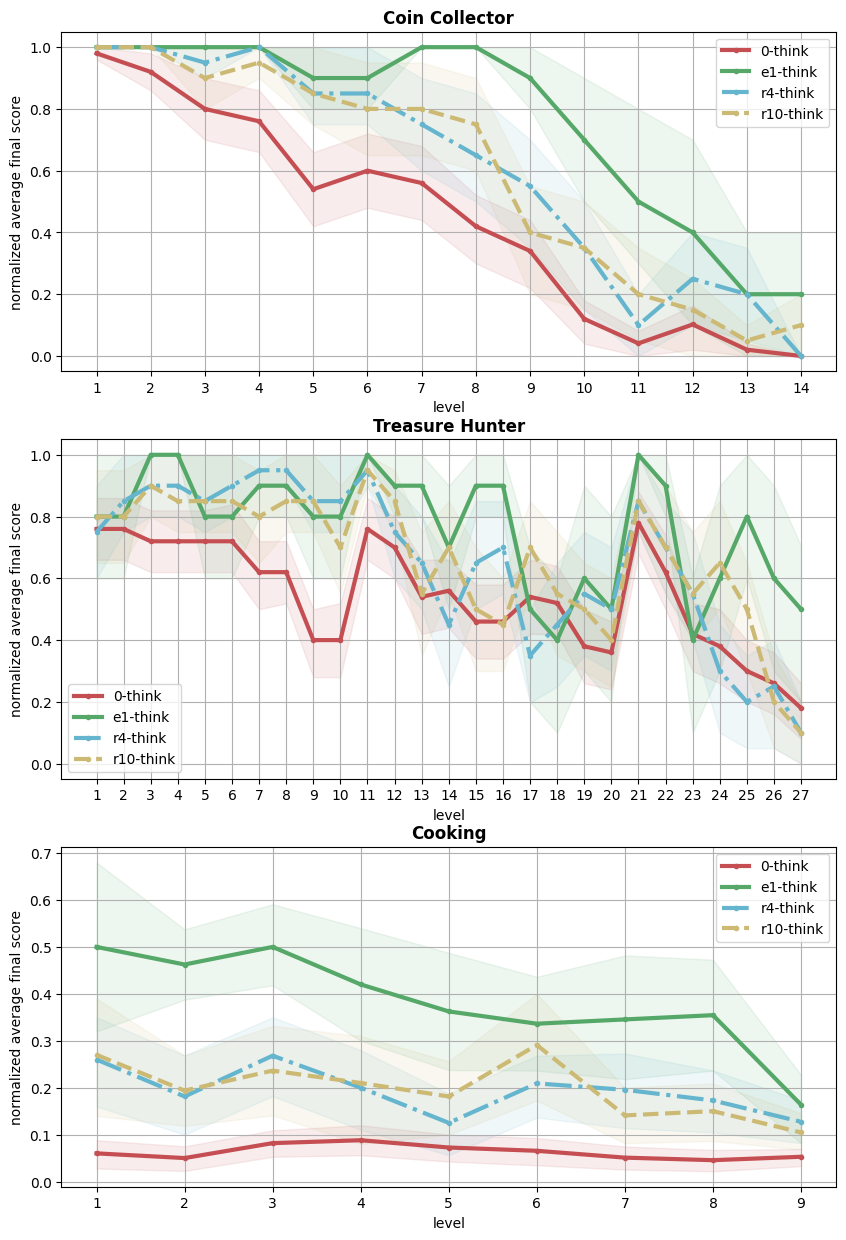

In [14]:
# %%%%% SCORE %%%%%

fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_scores.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y, y_ci = final_arrays_scores[game][model]

        ax.fill_between(x,
                        np.clip([k[0] for k in y_ci], 0, 1),
                        np.clip([k[1] for k in y_ci], 0, 1),
                        alpha=0.1,
                        color=custom_palette[j])

        ax.plot(x, y, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=3, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('normalized average final score')
    ax.set_title(f"{prettified_names[game]}", weight="bold")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()

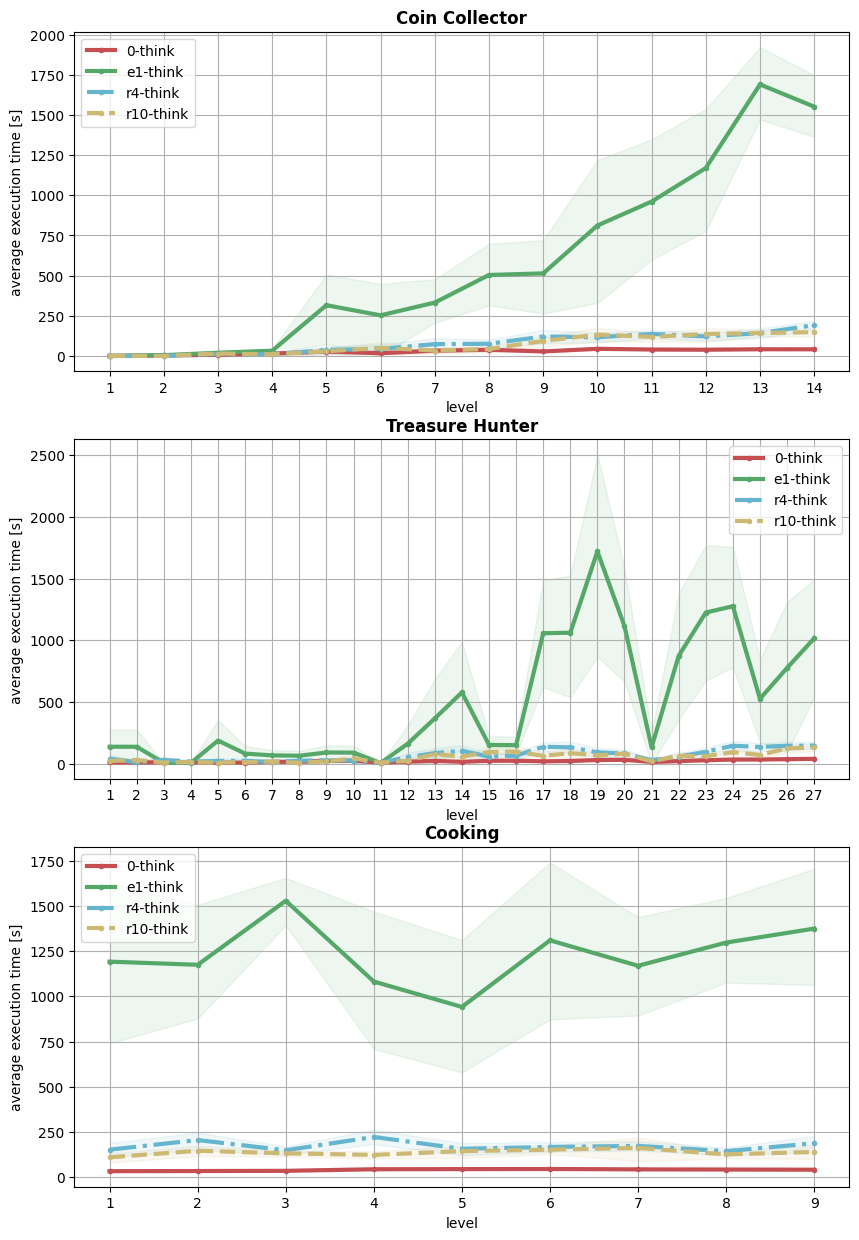

In [13]:
# %%%%% EXECUTION TIME %%%%%
fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "cooking": "Cooking", "treasure_hunter": "Treasure Hunter"}

for i, game in enumerate(final_arrays_times.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    for j, model in enumerate(models):
        y, y_ci = final_arrays_times[game][model]

        ax.fill_between(x,
                        np.clip([k[0] for k in y_ci], 0, a_max=None),
                        np.clip([k[1] for k in y_ci], 0, a_max=None),
                        alpha=0.1,
                        color=custom_palette[j])

        ax.plot(x, y, label=f"{model}-think", marker=".", linestyle=custom_linestyles[j], linewidth=3, color=custom_palette[j])
    
    ax.set_xlabel('level')
    ax.set_ylabel('average execution time [s]')
    ax.set_title(f"{prettified_names[game]}", weight="bold")
    ax.legend()

    ax.set_xticks(x)
    ax.grid()

plt.show()